In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math
import time
import random
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import preprocessing
import copy
import h5py
import scipy
from PIL import Image
from scipy import ndimage

## Loading Dataset from a h5py file

In [70]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [71]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


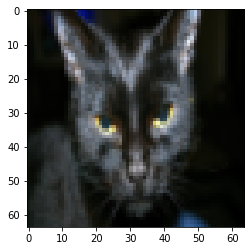

In [72]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [73]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
dims = train_set_x_orig.shape[1:]
print("Number of training datapoints",m_train)
print("Number of testing datapoints", m_test)
print("Dimensions of image", dims)

Number of training datapoints 209
Number of testing datapoints 50
Dimensions of image (64, 64, 3)


In [74]:
train_set_flatten = train_set_x_orig.reshape(m_train,-1).T
test_set_flatten = test_set_x_orig.reshape(m_test,-1).T

In [75]:
print("Train dataset shape:",train_set_flatten.shape)
print("Test dataset shape:",test_set_flatten.shape)

Train dataset shape: (12288, 209)
Test dataset shape: (12288, 50)


In [76]:
train_set_x = train_set_flatten/255
test_set_x = test_set_flatten/255

## Logistic Regression

In [27]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def initialize_with_zeros(dims):
    w = np.zeros((dims,1))
    b = 0.0
    return w,b

def propagate(w,b,X,Y):
    m = X.shape[1]
    Z = np.dot(w.T,X)+b
    A = sigmoid(Z)
    cost = -(np.sum(np.multiply(Y,np.log(A))+np.multiply(1-Y,np.log(1-A))))/m
    dZ = A-Y
    dw = (np.dot(X,dZ.T))/m
    db = np.sum(dZ)/m
    cost = np.squeeze(np.array(cost))
    return cost,dw,db

def gradient_descent(w,b,X,Y,num_iterations=1000,learning_rate=0.01):
    w, b = copy.deepcopy(w), copy.deepcopy(b)
    costs = []
    for i in range(1,num_iterations+1):
        cost,dw,db = propagate(w,b,X,Y)
        costs.append(cost)
        w = w-learning_rate*dw
        b = b-learning_rate*db
        if (i%100 == 0):
            print("Cost of",i,"th iteration is", cost)
            
    params = {"w":w,"b":b}
    grads = {"dw":dw,"db":db}
    return params,grads,costs

def predict(w,b,X):
    m = X.shape[1]
    y_pred = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    Z = np.dot(w.T,X)+b
    A = sigmoid(Z)
    for i in range(A.shape[1]):
        if(A[0][i]>0.5):
            y_pred[0][i] = 1
        else:
            y_pred[0][i] = 0
    return y_pred

In [32]:
def LogisticRegressionModel(X_train,Y_train,X_test,Y_test,num_iterations=1000,learning_rate=0.01):
    nx = X_train.shape[0]
    m = X_train.shape[1]
    w,b = initialize_with_zeros(nx)
    params,grads,costs = gradient_descent(w,b,X_train,Y_train,num_iterations,learning_rate)
    w,b = params["w"], params["b"]
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {
        "costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations
    }
    
    return d

In [33]:
logistic_regression_model = LogisticRegressionModel(train_set_x, train_set_y, test_set_x, test_set_y,2000,0.005)

Cost of 100 th iteration is 0.6448978829531701
Cost of 200 th iteration is 0.4848936141484849
Cost of 300 th iteration is 0.37776149521638075
Cost of 400 th iteration is 0.33177540555235874
Cost of 500 th iteration is 0.3035286720260554
Cost of 600 th iteration is 0.28009427757967503
Cost of 700 th iteration is 0.2602258475628189
Cost of 800 th iteration is 0.24310018399838854
Cost of 900 th iteration is 0.22814432769465365
Cost of 1000 th iteration is 0.21494377069682477
Cost of 1100 th iteration is 0.2031892821910463
Cost of 1200 th iteration is 0.19264428020365887
Cost of 1300 th iteration is 0.18312389153132902
Cost of 1400 th iteration is 0.17448101386887013
Cost of 1500 th iteration is 0.1665967535404291
Cost of 1600 th iteration is 0.1593736950985854
Cost of 1700 th iteration is 0.15273105849939206
Cost of 1800 th iteration is 0.14660114629898885
Cost of 1900 th iteration is 0.1409266916696517
Cost of 2000 th iteration is 0.13565884743936965
train accuracy: 99.04306220095694 %
t

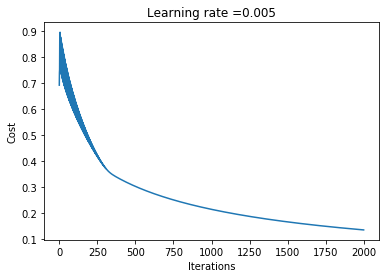

In [34]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

Training a model with learning rate: 0.01
Cost of 100 th iteration is 0.47934088102084715
Cost of 200 th iteration is 1.817220457958484
Cost of 300 th iteration is 1.0436850671148918
Cost of 400 th iteration is 0.7209062351541603
Cost of 500 th iteration is 0.4600137295026736
Cost of 600 th iteration is 0.24805515508482973
Cost of 700 th iteration is 0.15473347073292207
Cost of 800 th iteration is 0.1354464101311009
Cost of 900 th iteration is 0.12506418404852576
Cost of 1000 th iteration is 0.11655660496927349
Cost of 1100 th iteration is 0.10926054674330338
Cost of 1200 th iteration is 0.10286456752910302
Cost of 1300 th iteration is 0.09718346949629092
Cost of 1400 th iteration is 0.09209154665278337
Cost of 1500 th iteration is 0.08749622157295256
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

Training a model with learning rate: 0.001
Cost of 100 th iteration is 0.5917187287531944
Cost of 200 th iteration is 0.55

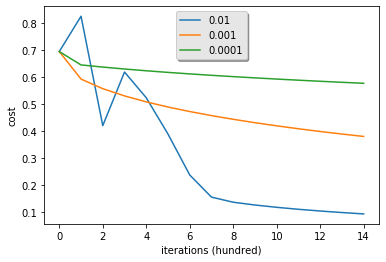

In [38]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = LogisticRegressionModel(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    models[str(lr)]["costs"] = np.squeeze(models[str(lr)]["costs"])
    models[str(lr)]["costs"] = models[str(lr)]["costs"][::100]
    plt.plot(models[str(lr)]["costs"], label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundred)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## Deep Neural Network

### 1) Forward Propagation 

In [93]:
def initialize_parameters_deep(layer_dims):
    parameters = {}
    L = len(layer_dims)
    for l in range(1,L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters["b"+str(l)] = np.zeros((layer_dims[l],1))
    return parameters

def linear_forward(A_prev,W,b):
    Z = np.dot(W,A_prev)+b
    cache = (A_prev,W,b)
    return Z,cache

def sigmoid_L(Z):
    A = sigmoid(Z)
    cache = (Z)
    return A,cache

def relu(Z):
    A = np.array(Z,copy=True)
    A[Z<=0] = 0
    return A

def relu_L(Z):
    A = relu(Z)
    cache = (Z)
    return A,cache

def linear_activation_forward(A_prev, W, b, activation):
    Z, linear_cache = linear_forward(A_prev,W,b)
    if activation == "sigmoid":
        A, activation_cache = sigmoid_L(Z)
    elif activation == "relu":
        A, activation_cache = relu_L(Z)
    cache = (linear_cache,activation_cache)
    return A,cache

def L_model_forward(X,parameters):
    caches = []
    A_prev = X
    L = len(parameters)//2
    for i in range(1,L):
        A,cache = linear_activation_forward(A_prev,parameters["W"+str(i)],parameters["b"+str(i)],"relu")
        A_prev = A
        caches.append(cache)
    AL, cache = linear_activation_forward(A_prev,parameters["W"+str(L)],parameters["b"+str(L)],"sigmoid")
    caches.append(cache)
    return AL,caches

def compute_cost(AL,Y):
    m = Y.shape[1]
    cost = -(np.sum(np.multiply(Y,np.log(AL)) + np.multiply(1-Y,np.log(1-AL))))/m
    cost = np.squeeze(cost)
    return cost

### 2) Backward Propagation

In [91]:
def linear_backward(dZ, cache):
    A_prev, W,b = cache
    m = A_prev.shape[1]
    dW = np.dot(dZ, A_prev.T)/m
    db = np.sum(dZ, axis = 1, keepdims = True)/m
    dA_prev = np.dot(W.T, dZ)
    return dA_prev, dW, db

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0
    return dZ

def sigmoid_backward(dA,cache):
    Z = cache
    s = sigmoid(Z)
    dZ = dA*s*(1-s)
    return dZ

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW,db = linear_backward(dZ,linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    current_cache = caches[-1]
    dA_prev, dW, db = linear_activation_backward(dAL,current_cache,"sigmoid")
    grads["dW"+str(L)] = dW
    grads["db"+str(L)] = db
    
    for i in range(L-1,0,-1):
        current_cache = caches[i-1]
        dA_prev, dW, db = linear_activation_backward(dA_prev,current_cache,"relu")
        grads["dW"+str(i)] = dW
        grads["db"+str(i)] = db
        
    return grads

### 3) Parameter Updation

In [81]:
def update_parameters(params,grads,learning_rate):
    parameters = params.copy()
    L = len(parameters)//2
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW"+str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db"+str(l+1)]
    return parameters

In [80]:
def L_layer_model(X,Y,layers_dims,learning_rate = 0.0075, num_iterations = 3000):
    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0,num_iterations):
        AL,caches = L_model_forward(X,parameters)
        cost = compute_cost(AL,Y)
        grads = L_model_backward(AL,Y,caches)
        costs.append(cost)
        parameters = update_parameters(parameters,grads,learning_rate)
        if (i+1)%100==0:
            print("Cost of", i+1,"th iteration is:", cost)
    return parameters,costs

In [94]:
layers_dims = [12288, 20, 7, 5, 1]
parameters, costs = L_layer_model(train_set_x, train_set_y, layers_dims, num_iterations = 2500)

Cost of 100 th iteration is: 0.6096268101768387
Cost of 200 th iteration is: 0.534116049023467
Cost of 300 th iteration is: 0.4812168777796284
Cost of 400 th iteration is: 0.4214940547531483
Cost of 500 th iteration is: 0.37704827561478976
Cost of 600 th iteration is: 0.28330865338194255
Cost of 700 th iteration is: 0.24490495946748383
Cost of 800 th iteration is: 0.15487358393374362
Cost of 900 th iteration is: 0.10634854598672827
Cost of 1000 th iteration is: 0.07199060879495706
Cost of 1100 th iteration is: 0.044451863712110185
Cost of 1200 th iteration is: 0.030228619267116185
Cost of 1300 th iteration is: 0.020811513994233435
Cost of 1400 th iteration is: 0.015768970048608607
Cost of 1500 th iteration is: 0.012486776905929288
Cost of 1600 th iteration is: 0.010167411894629398
Cost of 1700 th iteration is: 0.008493702297126572
Cost of 1800 th iteration is: 0.007235439730982031
Cost of 1900 th iteration is: 0.006261079576839564
Cost of 2000 th iteration is: 0.005481034133266412
Cost

In [97]:
def predict(X, Y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 
    p = np.zeros((1,m))
    probas, caches = L_model_forward(X, parameters)
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    print("Accuracy: "  + str(np.sum((p == Y)/m)))
    return p

In [99]:
Y_pred_test = predict(test_set_x,test_set_y,parameters)

Accuracy: 0.78


In [100]:
Y_pred_train = predict(train_set_x,train_set_y,parameters)

Accuracy: 0.9999999999999998


In [ ]:
layers_dims = [12288,20,7,7,5,5,1]
parameters, costs = L_layer_model(train_set_x, train_set_y, layers_dims,0.01, num_iterations = 2500)

Cost of 100 th iteration is: 0.5752391201667676
Cost of 200 th iteration is: 0.5388588841950153
Cost of 300 th iteration is: 0.46684872692515056
Cost of 400 th iteration is: 0.36283174550380176
Cost of 500 th iteration is: 0.3600258501923886
Cost of 600 th iteration is: 0.3883671676748844
Cost of 700 th iteration is: 0.49012560152413975


In [105]:
Y_pred_test = predict(test_set_x,test_set_y,parameters)

Accuracy: 0.3400000000000001


In [106]:
Y_pred_train = predict(train_set_x,train_set_y,parameters)

Accuracy: 0.6555023923444976
